In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv(r'C:\Users\franc\Desktop\SerieA-Data_Analysis\SerieA_Pulito_PartiteSingole.csv')

In [8]:
pd.set_option('display.max_columns', None)

df.head()

,Data,Ora,Competizione,Giornata,Giorno_Settimana,Sede,Risultato,Gol_Fatti_Casa,Gol_Subiti_Casa,Pronostico_Goals_Fatti_Casa,Pronostico_Goals_Subiti_Casa,Possesso_Palla_Casa,Spettatori,Capitano_Casa,Formazione_Casa,Formazione_Avversaria,Arbitro,Tiri_Totali_Casa,Tiri_in_Porta_Casa,Distanza_Tiri_Media_Casa,Calci_Punizione_Casa,Rigori_Segnati_Casa,Rigori_Tentati_Casa,Stagione,Squadra_Casa,Match_ID,Gol_Fatti_Ospite,Gol_Subiti_Ospite,Pronostico_Goals_Fatti_Ospite,Pronostico_Goals_Subiti_Ospite,Possesso_Palla_Ospite,Capitano_Ospite,Formazione_Ospite,Formazione_Avversaria_Vista_Ospite,Tiri_Totali_Ospite,Tiri_in_Porta_Ospite,Distanza_Tiri_Media_Ospite,Calci_Punizione_Ospite,Rigori_Segnati_Ospite,Rigori_Tentati_Ospite,Squadra_Ospite
0,2020-09-19,18:00,Serie A,Matchweek 1,Sat,Home,W,1.0,0.0,1.90,0.70,50.0,20811.0,Franck Ribéry,3-5-2,4-3-1-2,Rosario Abisso,15.0,5.0,15.700000,0.000000,0,0,2020,Fiorentina,2020-09-19_Fiorentina_Torino,0.0,1.0,0.70,1.90,50.0,Andrea Belotti,4-3-1-2,3-5-2,6.0,3.0,18.700000,1.000000,0,0,Torino
1,2020-09-19,20:45,Serie A,Matchweek 1,Sat,Home,W,3.0,0.0,0.75,1.75,40.0,20811.0,Miguel Veloso,3-4-3,3-4-3,Daniele Chiffi,8.0,3.0,17.808974,0.481538,0,0,2020,Hellas Verona,2020-09-19_Hellas Verona_Roma,0.0,3.0,1.75,0.75,60.0,Lorenzo Pellegrini,3-4-3,3-4-3,21.0,4.0,17.817708,0.402564,0,0,Roma
2,2020-09-20,12:30,Serie A,Matchweek 1,Sun,Home,L,0.0,2.0,0.30,1.60,39.0,1000.0,Bruno Alves,4-1-2-1-2◆,4-3-3,Maurizio Mariani,6.0,2.0,25.100000,0.000000,0,0,2020,Parma,2020-09-20_Napoli_Parma,2.0,0.0,1.60,0.30,61.0,Lorenzo Insigne,4-3-3,4-1-2-1-2,17.0,6.0,19.400000,0.000000,0,0,Napoli
3,2020-09-20,15:00,Serie A,Matchweek 1,Sun,Home,W,4.0,1.0,2.30,1.60,49.0,20811.0,Davide Biraschi,3-5-2,3-4-1-2,Giovanni Ayroldi,14.0,6.0,15.600000,0.000000,0,0,2020,Genoa,2020-09-20_Crotone_Genoa,1.0,4.0,1.60,2.30,51.0,Alex Cordaz,3-4-1-2,3-5-2,13.0,3.0,18.800000,0.000000,0,0,Crotone
4,2020-09-20,18:00,Serie A,Matchweek 1,Sun,Home,D,1.0,1.0,2.10,0.90,67.0,850.0,Domenico Berardi,4-2-3-1,4-1-4-1,Livio Marinelli,33.0,9.0,20.600000,3.000000,0,0,2020,Sassuolo,2020-09-20_Cagliari_Sassuolo,1.0,1.0,0.90,2.10,33.0,João Pedro,4-1-4-1,4-2-3-1,8.0,4.0,15.900000,1.000000,0,0,Cagliari


# Panoramica generale

In [10]:
#Aggiungiamo colonna gol totali della partita
df['Goals_Totali'] = df['Gol_Fatti_Casa']+df['Gol_Fatti_Ospite']
df.head()

,Data,Ora,Competizione,Giornata,Giorno_Settimana,Sede,Risultato,Gol_Fatti_Casa,Gol_Subiti_Casa,Pronostico_Goals_Fatti_Casa,Pronostico_Goals_Subiti_Casa,Possesso_Palla_Casa,Spettatori,Capitano_Casa,Formazione_Casa,Formazione_Avversaria,Arbitro,Tiri_Totali_Casa,Tiri_in_Porta_Casa,Distanza_Tiri_Media_Casa,Calci_Punizione_Casa,Rigori_Segnati_Casa,Rigori_Tentati_Casa,Stagione,Squadra_Casa,Match_ID,Gol_Fatti_Ospite,Gol_Subiti_Ospite,Pronostico_Goals_Fatti_Ospite,Pronostico_Goals_Subiti_Ospite,Possesso_Palla_Ospite,Capitano_Ospite,Formazione_Ospite,Formazione_Avversaria_Vista_Ospite,Tiri_Totali_Ospite,Tiri_in_Porta_Ospite,Distanza_Tiri_Media_Ospite,Calci_Punizione_Ospite,Rigori_Segnati_Ospite,Rigori_Tentati_Ospite,Squadra_Ospite,Goals_Totali
0,2020-09-19,18:00,Serie A,Matchweek 1,Sat,Home,W,1.0,0.0,1.90,0.70,50.0,20811.0,Franck Ribéry,3-5-2,4-3-1-2,Rosario Abisso,15.0,5.0,15.700000,0.000000,0,0,2020,Fiorentina,2020-09-19_Fiorentina_Torino,0.0,1.0,0.70,1.90,50.0,Andrea Belotti,4-3-1-2,3-5-2,6.0,3.0,18.700000,1.000000,0,0,Torino,1.0
1,2020-09-19,20:45,Serie A,Matchweek 1,Sat,Home,W,3.0,0.0,0.75,1.75,40.0,20811.0,Miguel Veloso,3-4-3,3-4-3,Daniele Chiffi,8.0,3.0,17.808974,0.481538,0,0,2020,Hellas Verona,2020-09-19_Hellas Verona_Roma,0.0,3.0,1.75,0.75,60.0,Lorenzo Pellegrini,3-4-3,3-4-3,21.0,4.0,17.817708,0.402564,0,0,Roma,3.0
2,2020-09-20,12:30,Serie A,Matchweek 1,Sun,Home,L,0.0,2.0,0.30,1.60,39.0,1000.0,Bruno Alves,4-1-2-1-2◆,4-3-3,Maurizio Mariani,6.0,2.0,25.100000,0.000000,0,0,2020,Parma,2020-09-20_Napoli_Parma,2.0,0.0,1.60,0.30,61.0,Lorenzo Insigne,4-3-3,4-1-2-1-2,17.0,6.0,19.400000,0.000000,0,0,Napoli,2.0
3,2020-09-20,15:00,Serie A,Matchweek 1,Sun,Home,W,4.0,1.0,2.30,1.60,49.0,20811.0,Davide Biraschi,3-5-2,3-4-1-2,Giovanni Ayroldi,14.0,6.0,15.600000,0.000000,0,0,2020,Genoa,2020-09-20_Crotone_Genoa,1.0,4.0,1.60,2.30,51.0,Alex Cordaz,3-4-1-2,3-5-2,13.0,3.0,18.800000,0.000000,0,0,Crotone,5.0
4,2020-09-20,18:00,Serie A,Matchweek 1,Sun,Home,D,1.0,1.0,2.10,0.90,67.0,850.0,Domenico Berardi,4-2-3-1,4-1-4-1,Livio Marinelli,33.0,9.0,20.600000,3.000000,0,0,2020,Sassuolo,2020-09-20_Cagliari_Sassuolo,1.0,1.0,0.90,2.10,33.0,João Pedro,4-1-4-1,4-2-3-1,8.0,4.0,15.900000,1.000000,0,0,Cagliari,2.0


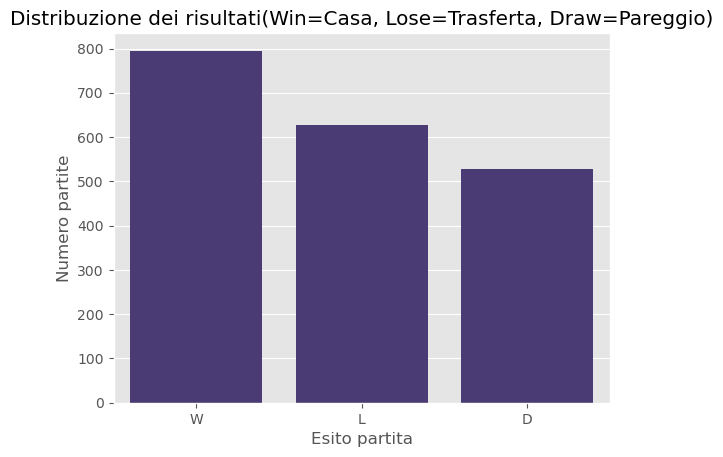

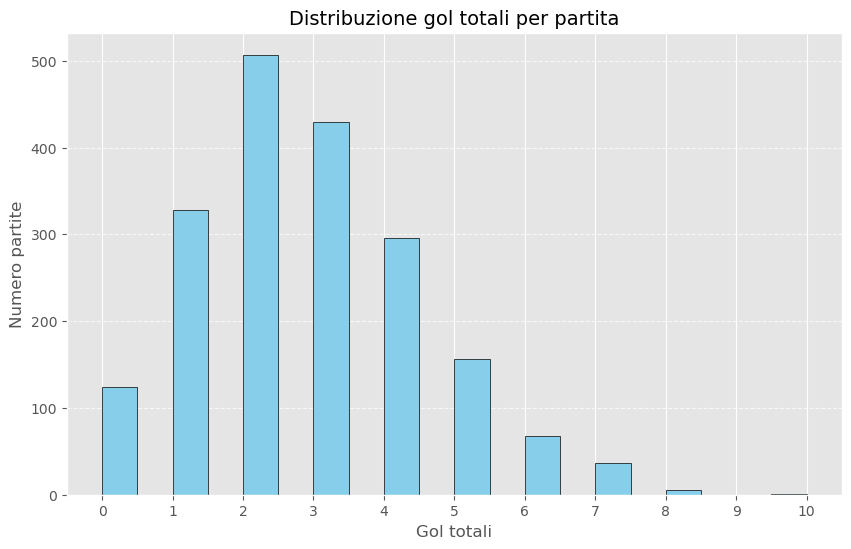

In [11]:
#Grafico Distribuzione dei risultati
sns.countplot(data=df, x='Risultato')
plt.title('Distribuzione dei risultati(Win=Casa, Lose=Trasferta, Draw=Pareggio)')
plt.xlabel('Esito partita')
plt.ylabel('Numero partite')
plt.show()

#Gradico Distribuzione dei gol totali per partita
plt.figure(figsize=(10,6))
plt.hist(df['Goals_Totali'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribuzione gol totali per partita', fontsize=14)
plt.xlabel('Gol totali')
plt.ylabel('Numero partite')
plt.xticks(range(int(df['Goals_Totali'].min()), int(df['Goals_Totali'].max())+1))
plt.grid(axis = 'y', linestyle = '--', alpha=0.7)
plt.show()

Possiamo notare che la maggior parte delle partite è terminata con un computo di gol totali pari a 2.

# Analisi dei gol

In [14]:
#Media gol casa e trasferta
print('Media casa: ', df['Gol_Fatti_Casa'].mean())

print('Media ospite: ',df['Gol_Fatti_Ospite'].mean())

Media casa:  1.4587391081496668
Media ospite:  1.2634546386468477


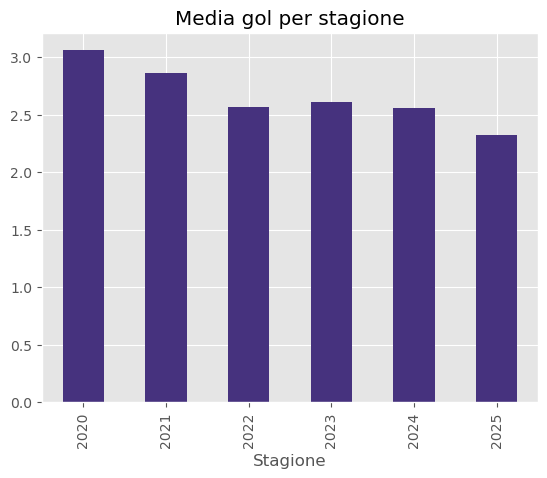

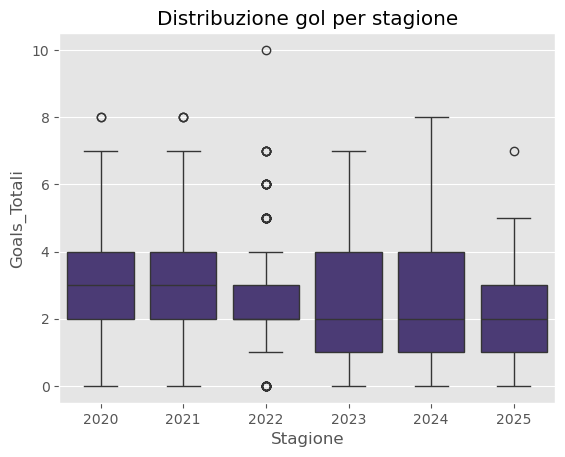

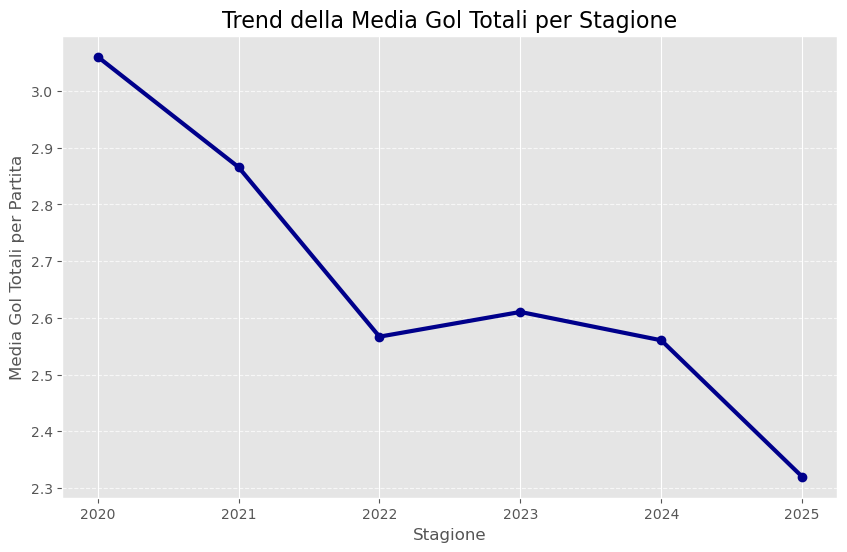

In [15]:
#Calcolo della Media dei Gol per ogni Stagione
media_gol_stagione = df.groupby('Stagione')['Goals_Totali'].mean()

#Diagramma Gol medi per stagione
media_gol_stagione.plot(kind='bar', title='Media gol per stagione')
plt.show()

#Boxplot per stagione
sns.boxplot(data=df,x='Stagione',y='Goals_Totali')
plt.title('Distribuzione gol per stagione')
plt.show()

#Grafico a linea per stagione per visualizzare il trend
plt.figure(figsize=(10, 6))
media_gol_stagione.plot(
    kind='line',
    marker='o',             #aggiunge un puntino in corrispondenza della stagione
    color='darkblue',
    linewidth=3
)
plt.title('Trend della Media Gol Totali per Stagione', fontsize=16)
plt.xlabel('Stagione', fontsize=12)
plt.ylabel('Media Gol Totali per Partita', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7) # Aggiunge griglia orizzontale
plt.xticks(rotation=0) # Mantiene le etichette dell'asse X diritte
plt.show()

##### Possiamo notare il trend del computo dei gol totali per partita.
Notiamo che la la somma è calata dal 2020 al 2025, quasi calante per ogni stagione.

Notiamo anche che la mediana per le stagioni dal 2020 al 2022 è di circa 3 gol per partita, per poi scendere a 2 nelle stagioni seguenti.

Inoltre abbiamo avuto meno variabilità di risultati nella stagione 2022 con più valori anomali ed alta variabilità nele stagioni 2023-2024.

Questo potrebbe riflettere un miglioramento delle difese, una tattica più prudente, o una maggiore aggressività del campionato.

# Analisi fattore casa

In [19]:
#Percentuale vittorie in casa, pareggio, trasferta
Conta_Risult = df['Risultato'].value_counts(normalize=True)*100
print(Conta_Risult)

#Squadre più forti in casa vs trasferta
Vittorie_Casa = df[df['Risultato']=='W'].groupby('Squadra_Casa').size().sort_values(ascending=False)
Vittorie_Ospite = df[df['Risultato']=='L'].groupby('Squadra_Ospite').size().sort_values(ascending=False)
print('\nVittorie squadre in casa: \n', Vittorie_Casa.head(20), '\n\nVittorie squadre fuori casa: \n', Vittorie_Ospite.head(20))

Risultato
W    40.748334
L    32.188621
D    27.063045
Name: proportion, dtype: float64

Vittorie squadre in casa: 
 Squadra_Casa
Inter            74
Roma             61
Juventus         61
Napoli           59
Milan            56
Lazio            52
Fiorentina       50
Atalanta         49
Bologna          46
Hellas Verona    31
Torino           30
Sassuolo         28
Udinese          25
Cagliari         21
Genoa            21
Empoli           19
Sampdoria        16
Monza            14
Spezia           14
Lecce            13
dtype: int64 

Vittorie squadre fuori casa: 
 Squadra_Ospite
Inter            58
Napoli           58
Milan            58
Atalanta         54
Lazio            47
Juventus         44
Roma             35
Fiorentina       29
Torino           28
Udinese          27
Bologna          26
Sassuolo         23
Hellas Verona    21
Empoli           16
Genoa            15
Monza            14
Cagliari         13
Sampdoria        12
Lecce            11
Spezia           11
dtype: in

Si evince che il fattore campo non influenza molto il risultato infatti abbiamo circa il 40% delle vittorie in casa ed il 32% delle vittorie degli ospiti.

Notiamo che in casa l'Inter è nettamente superiore alle concorrenti con 74 vittorie, mentre in trasferta Inter, Napoli e Milan primeggiano con 58 vittorie appena sopra l'Atalanta con 54 vittorie.

Notiamo che Inter, Napoli e Milan ottengono vittorie sia in casa che in trasferta, quasi di pari passo; pertanto il fattore campo non è molto influente. Differente per la Roma ad esempio dove notiamo che il fattore campo Casa è più influente; abbiamo infatti 61 vittorie in casa (ottimo, infatti è seconda dietro l'Inter) contro appena 35 vittorie in trasferta, così come anche la Fiorentina. Il Milan invece, seppur di poco, ha più vittorie in trasferta che in casa.

# Analisi per squadra

In [25]:
#Gol medi fatti/subiti per squadra
Statis_Squadra = df.groupby('Squadra_Casa').agg({
    'Gol_Fatti_Casa':'mean',
    'Gol_Subiti_Casa':'mean',
    'Risultato': lambda x: (x=='W').sum()
}).rename(columns={'Risultato':'Vittoria_Casa'}).sort_values('Gol_Fatti_Casa', ascending=False)

print(Statis_Squadra.head(20))

#Punti cumulativi per squadra
df['Punti_Casa'] = df['Risultato'].apply(lambda x:3 if x=='W' else (1 if x=='D' else 0))
df['Punti_Ospite'] = df['Risultato'].apply(lambda x:3 if x=='L' else (1 if x=='D' else 0))

# A. Punti guadagnati quando la squadra era in CASA
punti_casa = df.groupby('Squadra_Casa')['Punti_Casa'].sum().reset_index()
punti_casa = punti_casa.rename(columns={'Squadra_Casa': 'Squadra', 'Punti_Casa': 'Punti_Casa_Tot'})

# B. Punti guadagnati quando la squadra era in TRASFERTA
punti_trasferta = df.groupby('Squadra_Ospite')['Punti_Ospite'].sum().reset_index()
punti_trasferta = punti_trasferta.rename(columns={'Squadra_Ospite': 'Squadra', 'Punti_Ospite': 'Punti_Ospite_Tot'})

# C. Unisci le due tabelle
classifica = pd.merge(punti_casa, punti_trasferta, on='Squadra', how='outer')

# D. Calcolo del Totale punti
classifica['Tot_Punti'] = classifica['Punti_Casa_Tot'] + classifica['Punti_Ospite_Tot']

# Risultato corretto
print("\nClassifica Punti Totali:")
print(classifica.sort_values('Tot_Punti', ascending=False).head(20).to_string(index=False))

               Gol_Fatti_Casa  Gol_Subiti_Casa  Vittoria_Casa
Squadra_Casa                                                 
Inter                2.346939         0.846939             74
Atalanta             2.072165         1.247423             49
Napoli               1.927835         0.958763             59
Roma                 1.775510         0.857143             61
Milan                1.755102         0.938776             56
Lazio                1.752577         1.103093             52
Juventus             1.704082         0.785714             61
Fiorentina           1.690722         1.154639             50
Bologna              1.556701         1.051546             46
Frosinone            1.473684         1.684211              7
Como                 1.454545         1.272727              9
Sassuolo             1.379747         1.481013             28
Sampdoria            1.280702         1.508772             16
Cagliari             1.227848         1.620253             21
Udinese 

Le prime otto squadre mostrano tutte una forte dominanza in casa, segnando significativamente più gol di quanti ne subiscano.

Possiamo notare come l'Inter abbia il miglior attacco in casa, mentre la Juventus la miglior difesa.
L'inter è la squadra più efficace in quanto ha la differenza tra fatti e subiti più alta.
Abbiamo quindi Inter e Juventus che si distinguono per l'eccellente difesa casalinga (subiscono meno di un gol a partita), mentre Inter, Atalanta e Napoli sono i giganti offensivi.

Crotone, Salernitana e Spezia invece hanno un tasso molto alto di gol subiti in casa.
Per queste squadre, l'impatto del fattore campo è annullato dalla forte tendenza a subire gol. Il loro focus in termini di analisi dovrebbe essere sulla stabilizzazione della fase difensiva.

Notiamo dalla seconda tabella che l'Inter è la squadra che ha totalizzato più punti nelle stagioni analizzate, quindi domina seguito da Milan e Napoli.
Queste tre squadre inoltre denotano una debole influenza del campo che sia casa o trasferta.

La Roma come già detto è più proficua in casa, mentre l'Atalanta è un valore anomalo in quanto ha prestazioni migliori in trasferta.

Possiamo quindi trarre delle conclusioni, ovvero:
- Giocare contro Inter, Napoli o Milan è quasi sempre una sfida di alta difficoltà, indipendentemente dalla sede.
- Giocare contro la Roma o la Juventus in trasferta è significativamente meno impegnativo che affrontarle in casa.
- Affrontare l'Atalanta in casa potrebbe non essere l'inferno calcistico che ci si aspetterebbe, rispetto ad altre top-squadre.



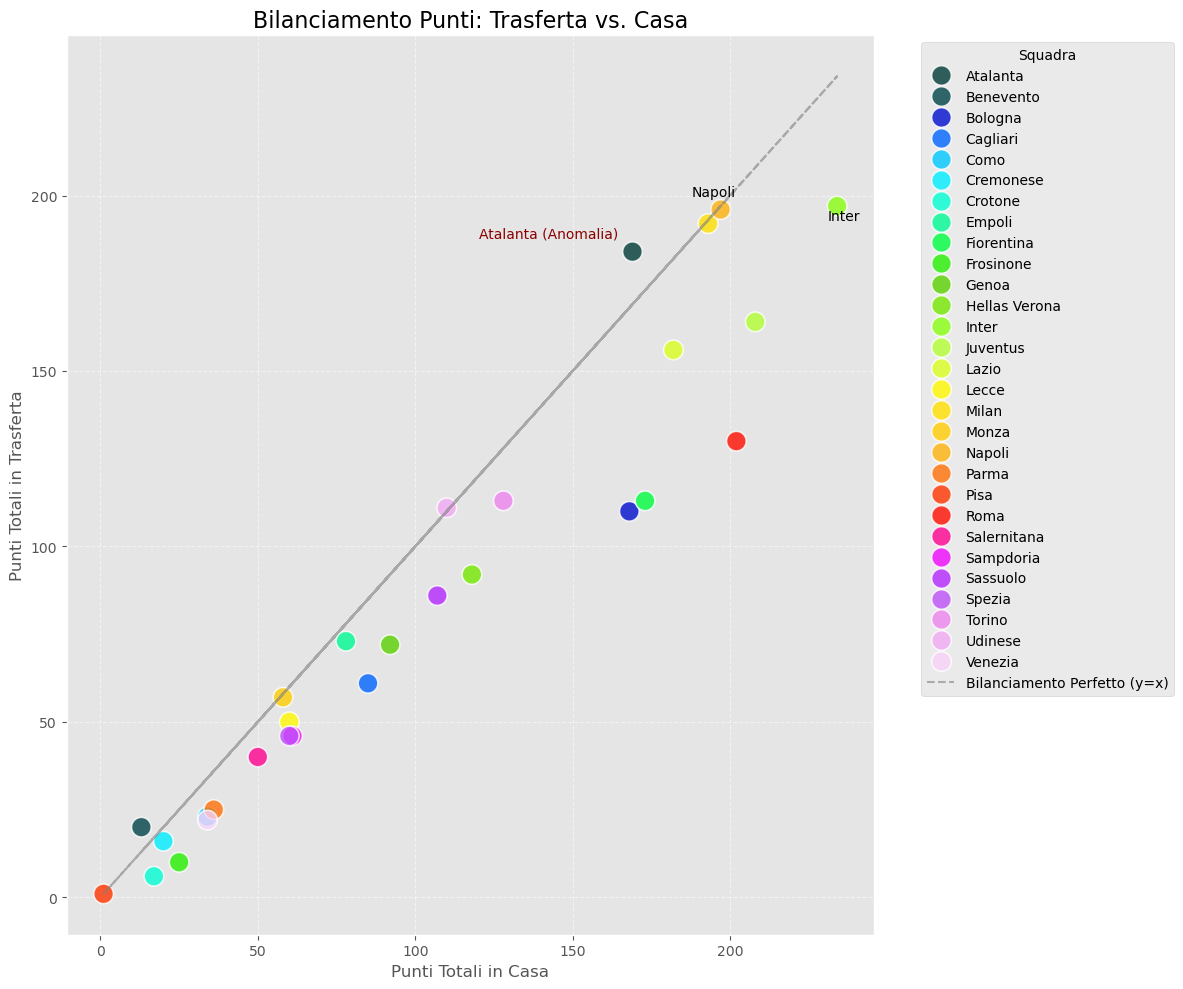

In [27]:
plt.figure(figsize=(12, 10)) # Aumentato leggermente lo spazio per la legenda

sns.scatterplot(
    x='Punti_Casa_Tot', 
    y='Punti_Ospite_Tot', 
    data=classifica,
    hue='Squadra', 
    s=200,         
    # RIMUOVI O IMPOSTA SU TRUE: legend=False
    # Se rimuovi 'legend=False', Seaborn la attiva di default grazie a 'hue'.
    alpha=0.8,
    palette='gist_ncar'
) 

# Aggiunge la linea diagonale y=x
plt.plot(classifica['Punti_Casa_Tot'], classifica['Punti_Casa_Tot'], 
         color='gray', linestyle='--', alpha=0.6, label='Bilanciamento Perfetto (y=x)')

# Aggiunta della Legenda
# La posiziona fuori dal grafico (in alto a destra)
plt.legend(title='Squadra', bbox_to_anchor=(1.05, 1), loc='upper left')

# Le tue Annotazioni rimangono (ricorda che potrebbero sovrapporsi alla legenda)
plt.annotate('Inter', (234, 197), textcoords="offset points", xytext=(5,-10), ha='center')
plt.annotate('Napoli', (197, 196), textcoords="offset points", xytext=(-5,10), ha='center')
plt.annotate('Atalanta (Anomalia)', (169, 184), textcoords="offset points", xytext=(-10,10), ha='right', color='darkred')

plt.title('Bilanciamento Punti: Trasferta vs. Casa', fontsize=16)
plt.xlabel('Punti Totali in Casa', fontsize=12)
plt.ylabel('Punti Totali in Trasferta', fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.5)
plt.tight_layout() # Assicura che la legenda non venga tagliata
plt.show()

Dal grafico a dispersione possiamo notare benissimo quanto detto prima, ovvero che l'Atalanta che si trova al di sopra della linea è un'anomalia in quanto sopra la linea ci sono solo le squadre che hanno più successo in trasferta, notiamo Napoli e Milan molto equilibrate ed Inter che in casa è molto forte.

# Analisi temporale

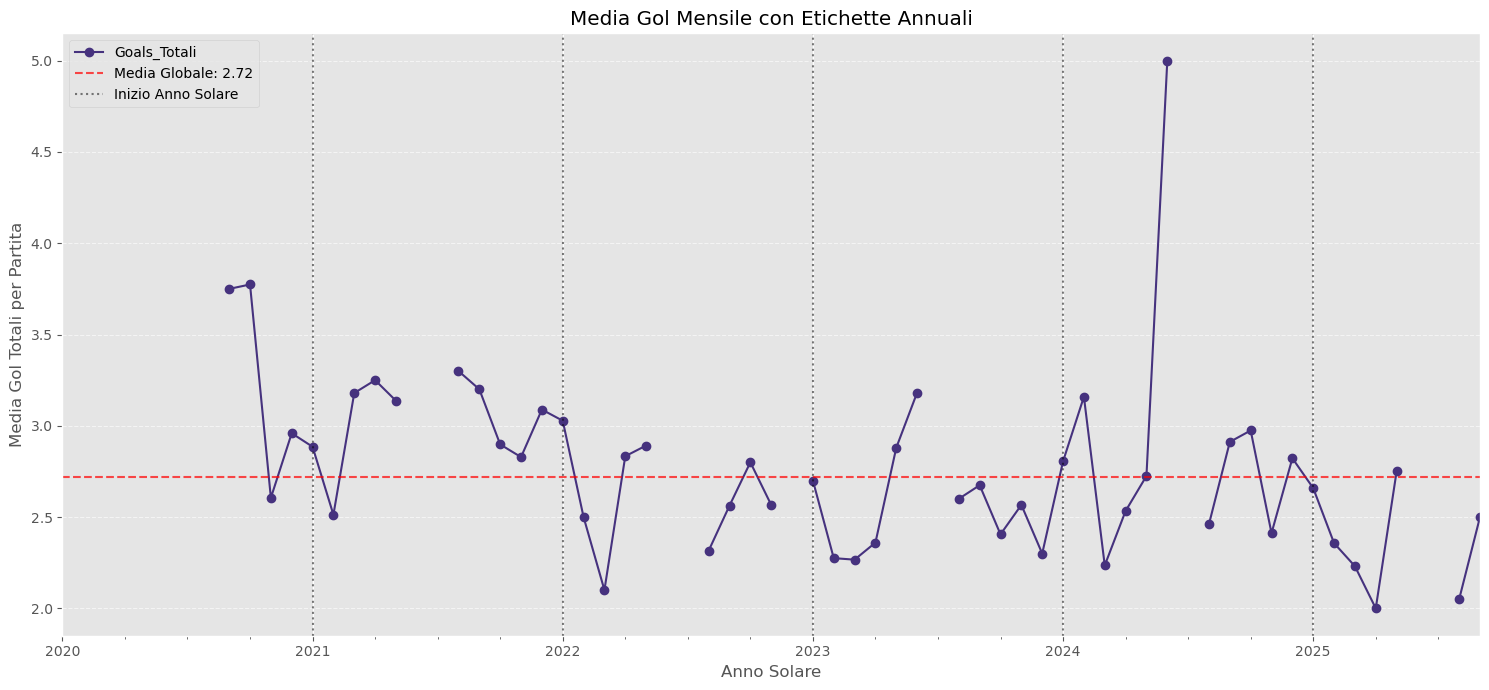

In [30]:
df.reset_index(inplace=True) 

df['Data'] = pd.to_datetime(df['Data'])
df.set_index('Data', inplace=True)

# Calcola la media globale dei gol
media_globale_gol = df['Goals_Totali'].mean()

plt.figure(figsize=(15, 7))

# Traccia la media gol mensile
serie_mensile = df['Goals_Totali'].resample('ME').mean()
linea_grafico = serie_mensile.plot(title='Media Gol Mensile con Etichette Annuali', 
                                    marker='o', linestyle='-')

# Aggiunge la linea di riferimento per la media globale
plt.axhline(media_globale_gol, color='red', linestyle='--', alpha=0.7, 
            label=f'Media Globale: {media_globale_gol:.2f}')

# --- IMPLEMENTAZIONE DELLE LINEE VERTICALI E TICK MANUALI ---

anni = serie_mensile.index.year.unique()
date_anni = [pd.to_datetime(f'{anno}-01-01') for anno in anni]
etichette_anni = [str(anno) for anno in anni]

label_aggiunta = False

for i, anno in enumerate(anni):
    data_inizio_anno = date_anni[i]
    
    # Disegna la linea verticale (solo dal 2021 in poi)
    if anno > serie_mensile.index.year.min():
        if not label_aggiunta: 
             plt.axvline(x=data_inizio_anno, color='black', linestyle=':', alpha=0.5, linewidth=1.5, 
                         label='Inizio Anno Solare')
             label_aggiunta = True
        else:
             plt.axvline(x=data_inizio_anno, color='black', linestyle=':', alpha=0.5, linewidth=1.5)

# 1. Imposta i TICK (le posizioni) per l'asse X all'inizio di ogni anno solare
plt.gca().set_xticks(date_anni)

# 2. Imposta le ETICHETTE (i nomi) sull'asse X
plt.gca().set_xticklabels(etichette_anni)

plt.xticks(rotation=0) 

plt.ylabel('Media Gol Totali per Partita')
plt.xlabel('Anno Solare')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

Le interruzioni nella linea e i buchi nel grafico (in cui la linea si interrompe) indicano periodi in cui non ci sono dati, a causa del calendario sportivo.

Vuoti (Luglio/Agosto): Queste sono le pause estive del campionato. I vuoti che si ripetono in questi mesi ogni anno sono normali e non indicano un problema di dati, ma semplicemente che la Serie A non si gioca in quel periodo.

Andamento a "U": Se osservi il trend all'interno di un singolo anno sportivo (settembre a maggio/giugno), l'asse X mostra la progressione della stagione.

Inizio Stagione (Settembre/Ottobre): Le squadre non hanno ancora trovato il massimo equilibrio difensivo, sono più aggressive e "scoperte" tatticamente.

Fine Anno Solare (Dicembre/Gennaio): Le condizioni meteorologiche peggiorano, le partite diventano più fisiche, e le squadre (sapendo di dover gestire il periodo delle festività) tendono a giocare con maggiore cautela difensiva.
Abbiamo pertanto il calo più netto e ricorrente che si verifica intorno alla fine dell'anno solare e all'inizio del nuovo anno.
Le squadre, in genere, affrontano un fitto calendario di partite tra metà dicembre e inizio gennaio. L'accumulo di stanchezza, unito alla necessità di non commettere errori prima o dopo la pausa, porta a un approccio più difensivo e conservativo. Gli allenatori tendono a privilegiare la solidità per "portare a casa" punti, riducendo l'esposizione al rischio e, di conseguenza, il numero totale di gol.

Fase Calda (Aprile/Maggio): Forte variabilità - Le squadre lottano per gli obiettivi (scudetto, coppe, salvezza), il che porta a partite più aperte e meno controllate (più gol o più sconfitte secche).

Media Globale vs. Varianza: La media globale dei gol è 2.72 (linea rossa tratteggiata). La maggior parte dei mesi oscilla tra 2.5 e 3.25 gol a partita.

Ciclicità e Pause: Il campionato mostra una chiara ciclicità. Si notano cali costanti ogni anno (i valori scendono verso 2.0-2.25) in corrispondenza delle pause invernali/festività (dicembre/gennaio), quando le squadre potrebbero giocare con più cautela.

Anomalia Offensiva (Fine 2024): C'è un picco estremo (che tocca i 5.0 gol a partita) verso la fine del 2024. Questo è un dato anomalo e probabilmente riflette un mese con un numero molto basso di partite giocate (controllare l'anno solare) o una coincidenza di partite ad altissimo punteggio.

Tendenza di Lungo Periodo: Escludendo il picco anomalo, il livello medio dei gol non mostra una tendenza netta di aumento o diminuzione, rimanendo stabile intorno al valore medio di 2.72.

Per una successiva analisi, bisognerebbe indagare il picco di fine 2024 per capire se è un dato reale o un errore nel calcolo (ad esempio, un raggruppamento anomalo).

L'analisi più significativa è la Media Gol per Stagione (2020/2021, 2021/2022, ecc.), che rimuoverà tutte le fluttuazioni mensili e darà un'indicazione chiara se il calcio italiano sia diventato più o meno offensivo in un confronto anno su anno.

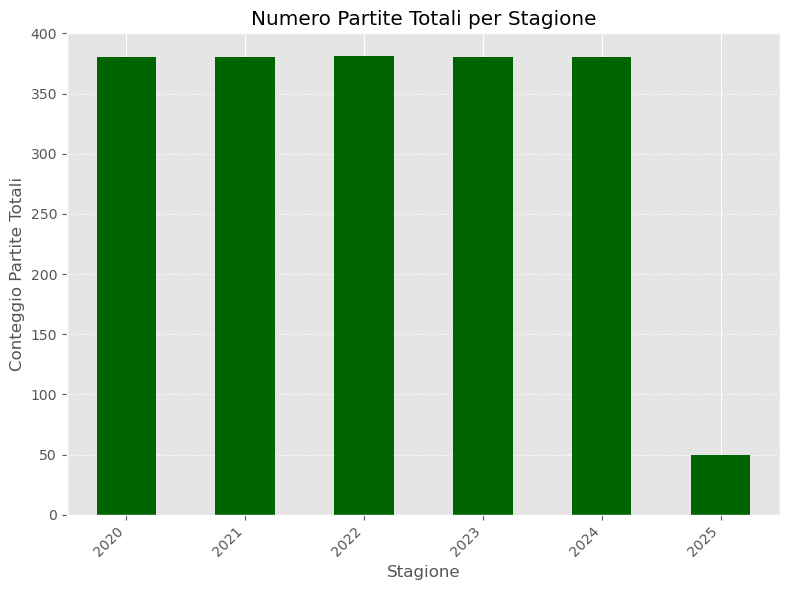

In [32]:
# Conta il numero di partite per ogni valore unico nella colonna 'Stagione'
conteggio_stagionale = df.groupby('Stagione').size()

plt.figure(figsize=(8, 6))

# Traccia il Bar Plot
conteggio_stagionale.plot(kind='bar', title='Numero Partite Totali per Stagione', color='darkgreen')

# Miglioramenti visuali
plt.ylabel('Conteggio Partite Totali')
plt.xlabel('Stagione')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Notiamo che il totale delle partite per ogni stagione è di 380 mentre essendo la stagione 2025 in corso ne abbiamo circa 50.

# Correlazione tra variabili

In [35]:
# 1. Crea la variabile Casa_Vince
df['Casa_Vince'] = (df['Risultato'] == 'W').astype(int)

# 2. Crea la variabile Casa_Perde
df['Ospite_Vince'] = (df['Risultato'] == 'L').astype(int)

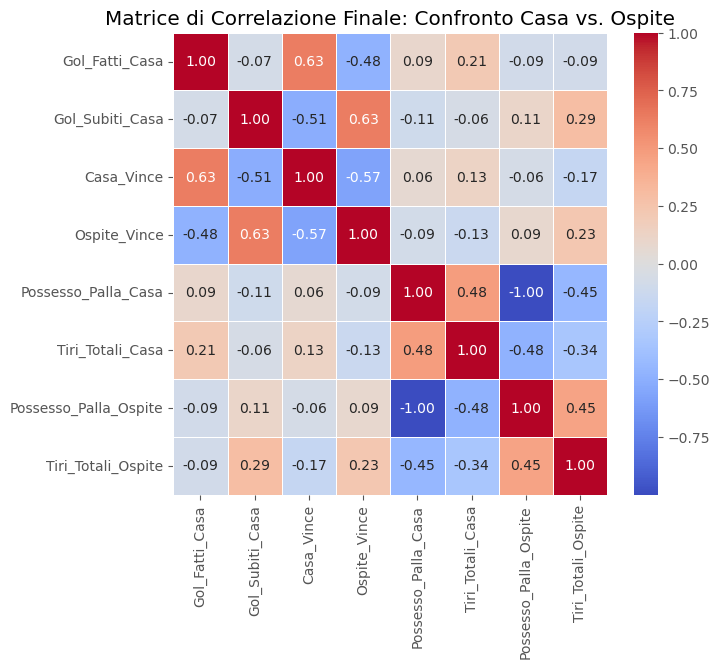

In [36]:
# Definisci le colonne con tutte le metriche di performance e di controllo
numeric_cols_finale = [
    'Gol_Fatti_Casa',
    'Gol_Subiti_Casa',
    'Casa_Vince',
    'Ospite_Vince',
    'Possesso_Palla_Casa',
    'Tiri_Totali_Casa',
    'Possesso_Palla_Ospite',   
    'Tiri_Totali_Ospite' 
]

df_correlazione_finale = df[numeric_cols_finale].copy()

# Calcola la matrice di correlazione
correlation_matrix_finale = df_correlazione_finale.corr()

plt.figure(figsize=(7, 6))
sns.heatmap(
    correlation_matrix_finale, 
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5,
    cbar=True
)

plt.title('Matrice di Correlazione Finale: Confronto Casa vs. Ospite')
plt.show()

#### Analisi Approfondita della Matrice di Correlazione Finale
L'analisi rivela come le dinamiche di gioco (controllo) degli ospiti siano molto diverse da quelle dei padroni di casa.

##### 1. La Relazione Inversa tra Controllo Palla
La correlazione più estrema (e attesa) conferma che l'analisi è a livello di singola partita e che il possesso palla è una risorsa fissa.

Possesso_Palla_Casa vs. Possesso_Palla_Ospite: −1.00 (Correlazione Negativa Perfetta).

Implicazione: Come atteso, se una squadra ha il 60% di possesso, l'altra ha il 40%. Questa relazione non è predittiva, ma conferma la coerenza dei dati.

##### 2. Le Strategie degli Ospiti: Efficacia, Non Controllo
Il successo degli ospiti non dipende affatto dal possesso palla, ma dalla capacità di creare occasioni (tiri) e, ovviamente, segnare.

Ospite_Vince vs. Possesso_Palla_Ospite	−0.06 (Quasi Nulla)	Non c'è vantaggio per l'ospite ad avere il controllo del gioco. La correlazione negativa debolissima indica che le vittorie in trasferta avvengono spesso con un gioco di contropiede o di transizione, sacrificando il possesso palla.

Ospite_Vince vs. Tiri_Totali_Ospite	+0.23 (Debole-Media Positiva)	C'è un legame molto debole tra la creazione di opportunità (tiri) e la vittoria. Questo è in netto contrasto con l'impatto dei Gol Fatti.

Ospite_Vince vs. Gol_Fatti_Ospite	+0.57 (Forte Positiva)	Il segnare è il fattore più importante per gli ospiti. La correlazione è inferiore al +0.63 dei padroni di casa, ma rimane il principale predittore di vittoria.

##### 3. La De-correlazione tra Tiri
A differenza del possesso (che è inversamente correlato), i tiri di una squadra sono quasi indipendenti dai tiri dell'altra.

Tiri_Totali_Casa vs. Tiri_Totali_Ospite: −0.34 (Debole Negativa).

Implicazione: La correlazione è sorprendentemente bassa. Significa che una partita non è necessariamente "dominata" da una parte: il fatto che una squadra tiri molto non esclude che anche l'altra squadra tiri molto. Le partite possono essere aperte e con molte occasioni da entrambe le parti.

##### 4. Il Ruolo del Possesso in Relazione ai Gol Subiti
Il possesso palla è più correlato con il subire gol che con il segnarli.

Possesso_Palla_Ospite vs. Gol_Subiti_Casa: −0.11 (Debole Negativa).

Implicazione: Le squadre ospiti con un possesso palla più alto tendono a far subire leggermente meno gol ai padroni di casa. Questo suggerisce un controllo difensivo (tenere palla lontano dalla propria porta) piuttosto che una minaccia offensiva diretta.

##### Conclusioni Aggiuntive per la Modellazione
Possesso Palla: I valori di correlazione per Possesso_Palla_Casa (+0.09 con Gol_Fatti_Casa) e Possesso_Palla_Ospite (quasi nullo con i risultati) confermano che il possesso è una variabile "rumorosa" con scarso potere predittivo sul risultato finale.

Dominio dei Gol: I predittori più importanti rimangono Gol_Fatti_Casa (+0.63) e Gol_Subiti_Casa (-0.51) per la vittoria casalinga. La creazione di opportunità (Tiri) è un predittore di secondo livello.

# Squadre più offensive e difensive

In [39]:
# 1. Calcola i punti per partita, assumendo che 'Risultato' sia 'W', 'D', 'L'
df['Punti_Ottenuti_Casa'] = df['Risultato'].apply(lambda x: 3 if x == 'W' else (1 if x == 'D' else 0))

# 2. Aggrega per squadra ('Squadra_Casa') calcolando le medie e la somma dei punti
Squadre_per_fascia = df.groupby('Squadra_Casa').agg(
    Gol_fatti=('Gol_Fatti_Casa', 'mean'),
    Gol_concessi=('Gol_Subiti_Casa', 'mean'), 
    Totale_Partite=('Squadra_Casa', 'count'), # Conteggio partite giocate in casa
    Totale_Punti=('Punti_Ottenuti_Casa', 'sum') 
).reset_index()

# 3. Calcola la media punti per partita (Punti / Partite Giocate)
Squadre_per_fascia['Punti_Medi_Casa'] = Squadre_per_fascia['Totale_Punti'] / Squadre_per_fascia['Totale_Partite']

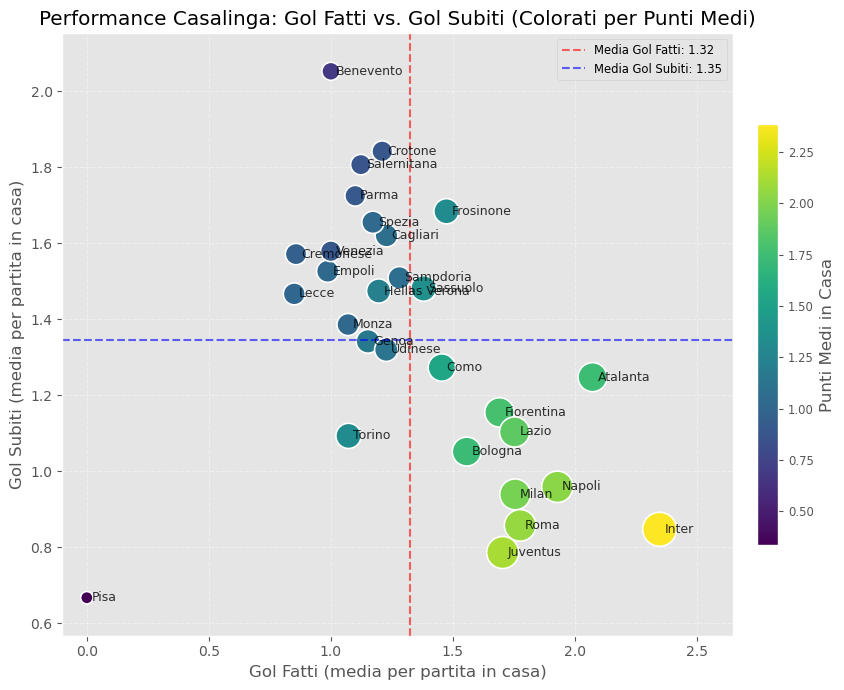

In [40]:
plt.figure(figsize=(9, 7))

sns.scatterplot(
    data=Squadre_per_fascia,
    x='Gol_fatti',
    y='Gol_concessi',
    hue='Punti_Medi_Casa', 
    size='Punti_Medi_Casa', 
    sizes=(80, 600),
    palette='viridis', 
    legend=False              #Disattiva la legenda generata automaticamente da scatterplot
)

# Ridisegna la Legenda Manualmente (Solo per il Colore) 
# Ottieni i dati necessari per creare la legenda dal plotter
norm = plt.Normalize(Squadre_per_fascia['Punti_Medi_Casa'].min(), Squadre_per_fascia['Punti_Medi_Casa'].max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([]) # Aggiunge un array vuoto (richiesto da Matplotlib)

# Crea la Colorbar che funge da Legenda
cbar = plt.colorbar(
    sm, 
    ax=plt.gca(),
    label='Punti Medi in Casa',
    shrink=0.7, # Riduci la dimensione della Colorbar (Legenda)
    pad=0.03, # Spazio tra il grafico e la Colorbar
    orientation='vertical'
)
cbar.ax.tick_params(labelsize='small') # Riduci la dimensione del font dei tick


# Aggiungi Linee di Riferimento (Medie Globali)
media_fatti = Squadre_per_fascia['Gol_fatti'].mean()
media_concessi = Squadre_per_fascia['Gol_concessi'].mean()

plt.axvline(media_fatti, color='red', linestyle='--', alpha=0.6, label=f'Media Gol Fatti: {media_fatti:.2f}')
plt.axhline(media_concessi, color='blue', linestyle='--', alpha=0.6, label=f'Media Gol Subiti: {media_concessi:.2f}')

# Aggiungi le Legende per le Linee di Riferimento
plt.legend(loc='upper right', fontsize='small')

# Aggiungi le Etichette delle Squadre
for index, row in Squadre_per_fascia.iterrows():
    plt.text(row['Gol_fatti'] + 0.02, row['Gol_concessi'], row['Squadra_Casa'], 
             horizontalalignment='left', verticalalignment='center', fontsize=9, 
             alpha=0.8)

plt.title('Performance Casalinga: Gol Fatti vs. Gol Subiti (Colorati per Punti Medi)')
plt.xlabel('Gol Fatti (media per partita in casa)')
plt.ylabel('Gol Subiti (media per partita in casa)')

# Imposta i limiti degli assi per dare spazio alle etichette
plt.xlim(Squadre_per_fascia['Gol_fatti'].min() - 0.1, Squadre_per_fascia['Gol_fatti'].max() + 0.3)
plt.ylim(Squadre_per_fascia['Gol_concessi'].min() - 0.1, Squadre_per_fascia['Gol_concessi'].max() + 0.1)

plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

Questo grafico a dispersione, che confronta i Gol Fatti in Casa (X) con i Gol Subiti in Casa (Y), colorato per i Punti Medi in Casa , ci permette di classificare e comprendere l'efficienza di ogni singola squadra nel campionato.

Analisi del Grafico: Gol Fatti vs. Gol Subiti (Media in Casa)

Il grafico si basa sulla correlazione più forte che abbiamo trovato: i punti ottenuti dipendono quasi interamente dai gol fatti e, soprattutto, dai gol subiti.

###### Quadranti di prestazione e classificazione
Le due linee tratteggiate (rossa per i Gol Fatti):≈1.35e blu per i Gol Subiti:≈1.35) dividono il campo in quattro quadranti di performance:

##### Quadrante---------------------------Asse X (Gol Fatti)----------------Asse Y (Gol Subiti)------------Punti Medi (Colore)--------------Squadre Esempio----------------------------
I. Elite (Basso a Destra)----------------------Alto-------------------------------Basso------------------Verde/Giallo Intenso--------Inter, Roma, Juventus, Napoli----------------------
II. Offensivi (Alto a Destra)------------------Alto---------------------.----------Alto--------------------Giallo/Verde Chiaro-----------Atalanta, Lazio, Fiorentina-----------------------
III. Difensivi/Pareggisti (Basso a Sinistra)---Basso------------------------------Basso------------------Verde Chiaro/Blu------------------------Pisa-------------------------------------
IV. Deboli (Alto a Sinistra)-------------------Basso------------------------------Alto-------------------------Blu Scuro----------------Crotone, Empoli, Verona-------------------------


###### Risultati più significativi
Le Squadre d'Élite (Basso a Destra):

Inter è la squadra più efficace, posizionandosi più a destra (massimi Gol Fatti) e mostrando il colore più intenso (massimi Punti Medi).

Juventus, Roma, Napoli si raggruppano chiaramente in questo quadrante, dimostrando un equilibrio tra un attacco sopra la media (a destra della linea rossa) e una difesa solida sotto la media (sotto la linea blu).

###### L'Efficacia della Difesa (Basso):

Pisa si distingue come l'estremo difensivo (in basso, vicino a 0.6 Gol Subiti), pur avendo un attacco molto debole (a sinistra). Nonostante i pochi gol fatti, l'efficacia difensiva gli garantisce di non essere un fanalino di coda nella classifica punti (colore verde chiaro).

La linea di tendenza mostra che le squadre più in basso (migliore difesa) hanno quasi sempre un colore più caldo (più punti), confermando che "subire poco" è fondamentale per la stabilità in classifica .

###### Le Squadre Vulnerabili (Alto a Sinistra):

Squadre come Crotone, Empoli o Verona si trovano nell'angolo peggiore: subiscono molto (sopra la linea blu) e segnano poco (a sinistra della linea rossa). Queste squadre sono colorate di blu scuro, indicando che si ottengono meno punti medi.

###### Conclusioni Definitive dal Grafico
I Punti Premiano l'Equilibrio: Le squadre che ottengono il massimo dei punti (colore giallo/verde intenso) non sono solo quelle che segnano di più, ma quelle che combinano un attacco superiore alla media con una difesa inferiore alla media.

Il Fattore Differenziale è la Difesa: Nessuna squadra ottiene una media di punti alta se si trova sopra la linea blu (Gol Subiti sopra la media). La capacità di limitare i gol subiti è il fattore che separa le squadre di alta classifica da tutte le altre.

Il Grafico Valida l'Analisi di Correlazione: Il pattern di questo scatter plot (punti caldi che si muovono verso il basso ea destra) è la prova visiva diretta dei forti coefficienti di correlazione che hai scoperto tra Punti_Casae Gol_Fatti_Casa/ Gol_Subiti_Casa.

# Facciamo lo stesso per gli ospiti

In [45]:
# 1. Calcola i punti per partita OSPITE
df['Punti_Ottenuti_Ospite'] = df['Risultato'].apply(lambda x: 0 if x == 'W' else (1 if x == 'D' else 3))

# 2. Aggrega per squadra ('Squadra_Ospite') calcolando le medie e la somma dei punti
Squadre_Ospite_per_fascia = df.groupby('Squadra_Ospite').agg(
    Gol_fatti_ospite=('Gol_Fatti_Ospite', 'mean'),
    Gol_subiti_ospite=('Gol_Subiti_Ospite', 'mean'), 
    Totale_Partite_ospite=('Squadra_Ospite', 'count'), # Conteggio partite giocate in trasferta
    Totale_Punti_ospite=('Punti_Ottenuti_Ospite', 'sum') 
).reset_index()

# 3. Calcola la media punti per partita in trasferta
Squadre_Ospite_per_fascia['Punti_Medi_Ospite'] = Squadre_Ospite_per_fascia['Totale_Punti_ospite'] / Squadre_Ospite_per_fascia['Totale_Partite_ospite']


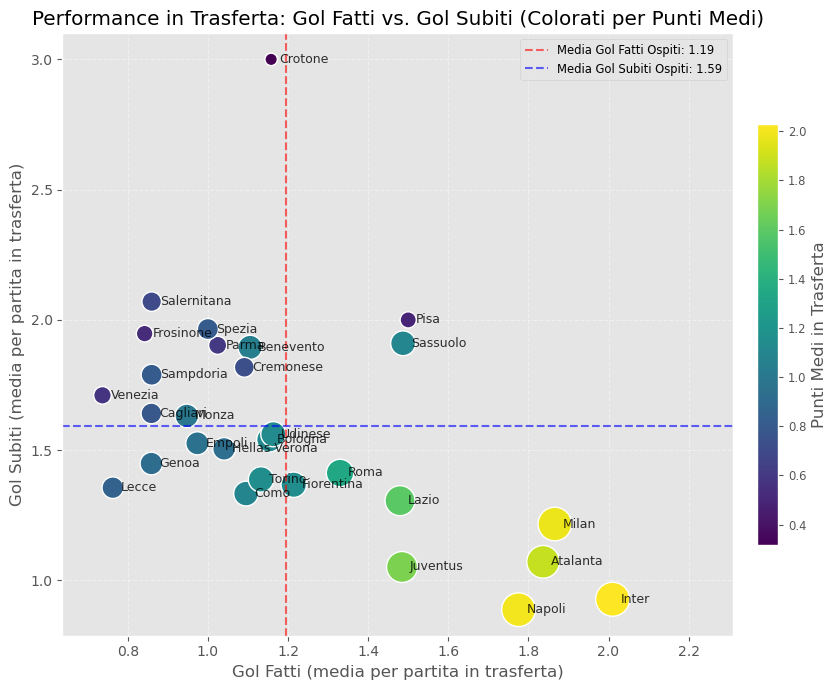

In [46]:
plt.figure(figsize=(9, 7))

# Genera lo scatter plot per gli ospiti
sns.scatterplot(
    data=Squadre_Ospite_per_fascia,
    x='Gol_fatti_ospite',
    y='Gol_subiti_ospite',
    hue='Punti_Medi_Ospite', 
    size='Punti_Medi_Ospite', 
    sizes=(80, 600),
    palette='viridis', 
    legend=False # Disattiva la legenda automatica di Seaborn
)

# --- Gestione della Colorbar/Legenda ---
norm_ospite = plt.Normalize(Squadre_Ospite_per_fascia['Punti_Medi_Ospite'].min(), Squadre_Ospite_per_fascia['Punti_Medi_Ospite'].max())
sm_ospite = plt.cm.ScalarMappable(cmap="viridis", norm=norm_ospite)
sm_ospite.set_array([]) 

cbar_ospite = plt.colorbar(
    sm_ospite, 
    ax=plt.gca(),
    label='Punti Medi in Trasferta',
    shrink=0.7, 
    pad=0.03, 
    orientation='vertical'
)
cbar_ospite.ax.tick_params(labelsize='small') 

# --- Aggiungi Linee di Riferimento (Medie Globali in Trasferta) ---
media_fatti_ospite_globale = Squadre_Ospite_per_fascia['Gol_fatti_ospite'].mean()
media_subiti_ospite_globale = Squadre_Ospite_per_fascia['Gol_subiti_ospite'].mean()

plt.axvline(media_fatti_ospite_globale, color='red', linestyle='--', alpha=0.6, 
            label=f'Media Gol Fatti Ospiti: {media_fatti_ospite_globale:.2f}')
plt.axhline(media_subiti_ospite_globale, color='blue', linestyle='--', alpha=0.6, 
            label=f'Media Gol Subiti Ospiti: {media_subiti_ospite_globale:.2f}')

# Aggiungi le Legende per le Linee di Riferimento
plt.legend(loc='upper right', fontsize='small')


# --- Aggiungi le Etichette delle Squadre ---
for index, row in Squadre_Ospite_per_fascia.iterrows():
    plt.text(row['Gol_fatti_ospite'] + 0.02, row['Gol_subiti_ospite'], row['Squadra_Ospite'], 
             horizontalalignment='left', verticalalignment='center', fontsize=9, 
             alpha=0.8)

plt.title('Performance in Trasferta: Gol Fatti vs. Gol Subiti (Colorati per Punti Medi)')
plt.xlabel('Gol Fatti (media per partita in trasferta)')
plt.ylabel('Gol Subiti (media per partita in trasferta)')

# Imposta i limiti degli assi per dare spazio alle etichette
plt.xlim(Squadre_Ospite_per_fascia['Gol_fatti_ospite'].min() - 0.1, Squadre_Ospite_per_fascia['Gol_fatti_ospite'].max() + 0.3)
plt.ylim(Squadre_Ospite_per_fascia['Gol_subiti_ospite'].min() - 0.1, Squadre_Ospite_per_fascia['Gol_subiti_ospite'].max() + 0.1)

plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

#### Analisi per Quadrante: Performance in Trasferta

Il grafico rivela che il successo in trasferta è ancora più polarizzato che in casa, con pochissime squadre che riescono a combinare attacco e difesa sopra la media.

##### I. Quadrante Elite: 
Efficacia e Dominio (Basso a Destra)Definizione: Squadre che ottengono risultati sopra la media in attacco (X > 1.25) e sopra la media in difesa (Y < 1.59).Rosa:  Inter, Juventus, Napoli, Milan, Atalanta. (Club con il colore più caldo: giallo intenso).

###### Analisi: 
Questo è il cluster delle squadre che fanno i punti per vincere il campionato. L' Inter è la squadra più efficace, con la massima media di punti. L' equilibrio è la chiave: sono le uniche che in trasferta riescono a segnare tanto e allo stesso tempo a mantenere una difesa migliore della media del campionato.

##### II. Quadrante offensivo: 
Forti ma vulnerabili (Alto a Destra)Definizione: Squadre con risultati sopra la media in attacco (X > 1.25) ma sotto la media in difesa (Y > 1.59).Squadra:  Verona, Fiorentina, Roma, Lazio (posizionate appena sopra la linea blu).

###### Analisi: 
Queste squadre tendono a giocare partite più aperte e ad alto punteggio in trasferta. La loro abilità offensiva è sufficiente a fargli guadagnare punti (colore verde chiaro), ma la difesa "ballerina" (subiscono più della media) impedisce loro di raggiungere l'efficacia d'élite dell'Inter o della Juventus. Le loro prestazioni nel trasferimento sono il loro principale fattore di incertezza nella classifica.

##### III. Quadrante Difensivo: 
Pochi Rischi, Pochi Punti (Basso a Sinistra)Definizione: Squadre con risultati sotto la media in attacco (X < 1.25) e sopra la media in difesa (Y < 1.59).Squadre:  Lecce, Bologna, Torino, Spezia.

###### Analisi: 
Queste squadre si concentrano sulla solidità difensiva ( Yè basso), spesso cercando di pareggiare 0-0 o 1-1. Sebbene siano sotto la media offensiva, il loro approccio conservativo nel trasferimento le mantiene al riparo dalla zona retrocessione. Il colore (verde chiaro/azzurro) indica una media punti modesta, sufficiente per la metà classifica.

##### IV. Quadrante Debole:
Vulnerabilità Totale (Alto a Sinistra)Definizione: Squadre con risultati sotto la media in attacco (X < 1.25) e sotto la media in difesa (Y > 1.59).Squadre:  Crotone, Salernitana, Benevento, Sampdoria, Frosinone, Venezia, Empoli .

###### Analisi: 
Queste squadre sono le candidate alla retrocessione (colore blu scuro, bassa media punti). La trasferta è un peso: non riescono a segnare abbastanza (sinistra) e subiscono troppo (alto). Crotone è l'estremo negativo: subisce il massimo dei gol con un attacco al di sotto della media.

##### Conclusioni Aggiuntive
Nessuna Squadra Specializzata in Trasferta: Non ci sono squadre che, pur essendo mediocri in casa, dominano la classifica solo grazie alle performance in trasferta. Il dominio è esercitato dalle stesse élite (Inter, Juventus, Napoli).La pressione della trasferta: La media globale dei gol subiti è significativamente più alta in trasferta ($\approx 1.59$) rispetto a in casa ($\approx 1.35$). Ciò dimostra che la pressione del fattore campo penalizza le difese di quasi tutte le squadre.

## Analisi di confronto dei due grafici a dispersione

###### Dominio Coerente: 
Gli stessi top club che dominano in casa (Inter, Milan, Juventus, Napoli) si confermano nell'élite anche in trasferta, posizionandosi più in basso ea destra, e mostrando i colori più caldi (più punti).

Inter: Anche in trasferta, l'Inter si distingue per l'attacco più forte (più a destra) e una difesa solida (bassa Y), ottenendo la media punti più alta.

Milan & Atalanta: Queste squadre mostrano un attacco estremamente forte (X alta) ma anche una difesa leggermente meno impenetrabile rispetto a Inter/Juventus in trasferta.

##### Differenze Cruciali Rispetto al Grafico di Casa

Il grafico in trasferta mostra una maggiore dispersione verticale e un attacco medio più basso per quasi tutte le squadre.

###### Vantaggio Difensivo Meno Marcato: 
In trasferta, è molto più difficile mantenere i gol subiti bassi. La media globale dei Gol Subiti è più alta (≈1.59in trasferta contro≈1.35in casa). Le squadre vincenti riescono comunque a stare sotto questa media, ma il cluster è meno compatto rispetto a casa.

Lazio e Roma: Mentre in casa la Roma e la Lazio erano nel quadrante d'élite, in trasferta mostrano una performance più equilibrata o leggermente sopra la media difensiva (Y sopra 1.59). La loro forza offensiva le salva, ma la difesa in trasferta è meno dominante.

###### Le Strategie di Sopravvivenza in Trasferta (Alto a Sinistra)
Squadre 'Aggrappate': Le squadre di bassa classifica si concentrano nell'angolo in alto a sinistra , subendo molti gol e segnandone pochi (Sassuolo, Frosinone, Salernitana).

###### Difesa Efficace Fuori Casa (Rara): 
Non ci sono molte squadre con la stessa efficacia difensiva del Pisa che avevamo visto nel grafico in casa (dove aveva≈0,6gol subiti). In trasferta, tutte le squadre subiscono di più.

#### Conclusioni dal Confronto Casa vs. Trasferta
Omogeneità al Vertice: Le squadre di alta classifica sono coerentimente forti sia in attacco che in difesa, indipendentemente dal campo. Non sono specializzati, sono semplicemente migliori in tutte le metriche.

Il Peso del Fattore Campo: La linea di demarcazione tra le squadre forti e quelle deboli è molto più netta in casa che in trasferta. In trasferta, i club si ammassano di più intorno alle medie globali, suggerendo che le partite sono generalmente più difficili ed i margini di errore più sottili.

La Correlazione è Valida su entrambi i Fronti: Il fatto che i punti più grandi e caldi si concentrino ancora nell'angolo Basso a Destra conferma che la correlazione tra Gol Fatti/Subiti e Punti Ottenuti è robusta e universale, sia in casa che in trasferta.

# Analisi calci di punizione e rigori

In [50]:
numeric_cols_disciplina = [
    'Gol_Fatti_Casa',
    'Gol_Subiti_Casa',
    'Rigori_Segnati_Casa',
    'Rigori_Tentati_Casa',
    'Calci_Punizione_Casa',
    'Rigori_Segnati_Ospite',
    'Rigori_Tentati_Ospite',
    'Calci_Punizione_Ospite',
    'Possesso_Palla_Casa',
    'Possesso_Palla_Ospite',
    'Casa_Vince',
    'Ospite_Vince'
]

df_correlazione_disciplina = df[numeric_cols_disciplina].copy()

# Calcola la matrice di correlazione
correlation_matrix_disciplina = df_correlazione_disciplina.corr()

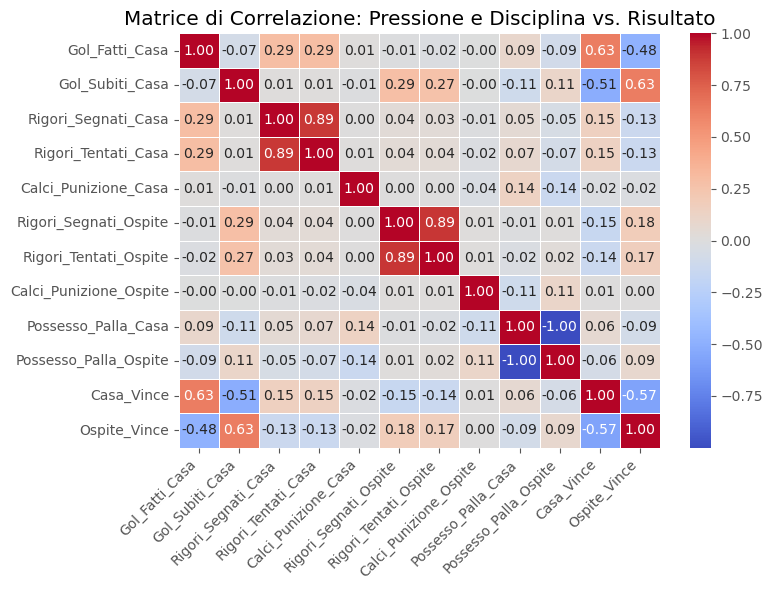

In [51]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix_disciplina, 
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5,
    cbar=True
)

plt.title('Matrice di Correlazione: Pressione e Disciplina vs. Risultato')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Possiamo notare come i calci di punizione non influiscono sui gol fatti, che la maggior parte dei rigori tentati sono anche rigori segnati e che segnare un rigore non porta alla vittoria ma contribuisce.
Notiamo inoltre che avere più possesso porta a più calci di punizione.

In [53]:
# 1. Calcola i punti per partita in casa 
df['Punti_Ottenuti_Casa'] = df['Risultato'].apply(lambda x: 3 if x == 'W' else (1 if x == 'D' else 0))

# 2. Aggrega i dati per squadra quando gioca in casa
Squadre_Disciplina = df.groupby('Squadra_Casa').agg(
    Rigori_Subiti_Mean=('Rigori_Tentati_Ospite', 'mean'),
    Totale_Partite=('Squadra_Casa', 'count'),
    Totale_Punti=('Punti_Ottenuti_Casa', 'sum') 
).reset_index()

# 3. Calcola la media punti per partita
Squadre_Disciplina['Punti_Medi_Casa'] = Squadre_Disciplina['Totale_Punti'] / Squadre_Disciplina['Totale_Partite']

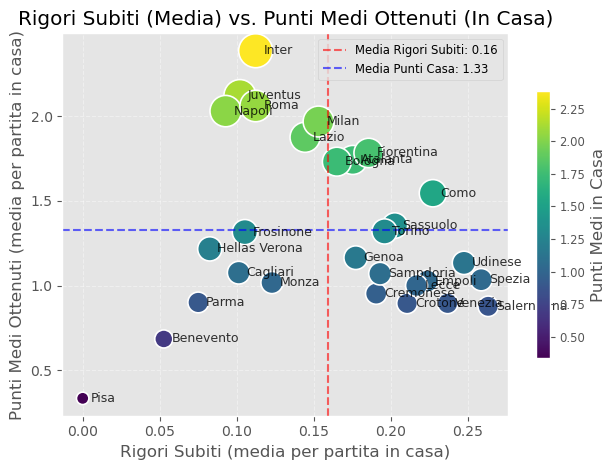

In [54]:
sns.scatterplot(
    data=Squadre_Disciplina,
    x='Rigori_Subiti_Mean',
    y='Punti_Medi_Casa',
    hue='Punti_Medi_Casa', # Usa il colore per rafforzare il risultato
    size='Punti_Medi_Casa', 
    sizes=(80, 600),
    palette='viridis', 
    legend=False # Disattiva la legenda automatica (eccessivamente grande)
)

# --- Aggiungi Linee di Riferimento (Medie Globali) ---
media_rigori = Squadre_Disciplina['Rigori_Subiti_Mean'].mean()
media_punti = Squadre_Disciplina['Punti_Medi_Casa'].mean()

plt.axvline(media_rigori, color='red', linestyle='--', alpha=0.6, label=f'Media Rigori Subiti: {media_rigori:.2f}')
plt.axhline(media_punti, color='blue', linestyle='--', alpha=0.6, label=f'Media Punti Casa: {media_punti:.2f}')

# --- Aggiungi le Etichette delle Squadre ---
for index, row in Squadre_Disciplina.iterrows():
    plt.text(row['Rigori_Subiti_Mean'] + 0.005, row['Punti_Medi_Casa'], row['Squadra_Casa'], 
             horizontalalignment='left', verticalalignment='center', fontsize=9, 
             alpha=0.8)

# --- Gestione Colorbar ---
norm = plt.Normalize(Squadre_Disciplina['Punti_Medi_Casa'].min(), Squadre_Disciplina['Punti_Medi_Casa'].max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([]) 
cbar = plt.colorbar(sm, ax=plt.gca(), label='Punti Medi in Casa', shrink=0.7)
cbar.ax.tick_params(labelsize='small') 

# Aggiungi Legenda per le linee
plt.legend(loc='upper right', fontsize='small')

plt.title('Rigori Subiti (Media) vs. Punti Medi Ottenuti (In Casa)')
plt.xlabel('Rigori Subiti (media per partita in casa)')
plt.ylabel('Punti Medi Ottenuti (media per partita in casa)')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

Questo grafico eleva l'analisi: la disorganizzazione non porta solo a subire gol, ma direttamente a perdere punti.

L'Inter è la più efficace, ottenendo il massimo dei punti con una media di rigori subiti molto vicina allo zero. Questo dimostra che l'efficacia delle top club non deriva solo dal segnare, ma anche dalla disciplina e dalla lucidità dei difensori in area. La loro difesa non commette errori cruciali.

La Salernitana è un'anomalia, potrebbe essere un outlier.

Per Cagliari, Como, Benevento e Frosinone (con Como e Frosinone che subiscono il massimo dei rigori), subire rigori è un sintomo diretto di crisi. La disorganizzazione difensiva non solo contribuisce a subire gol (come visto nella matrice), ma distrugge la media punti, confermando che i falli gravi in area sono un fattore chiave di sconfitta.

# Valutazione arbitri che concedono più rigori

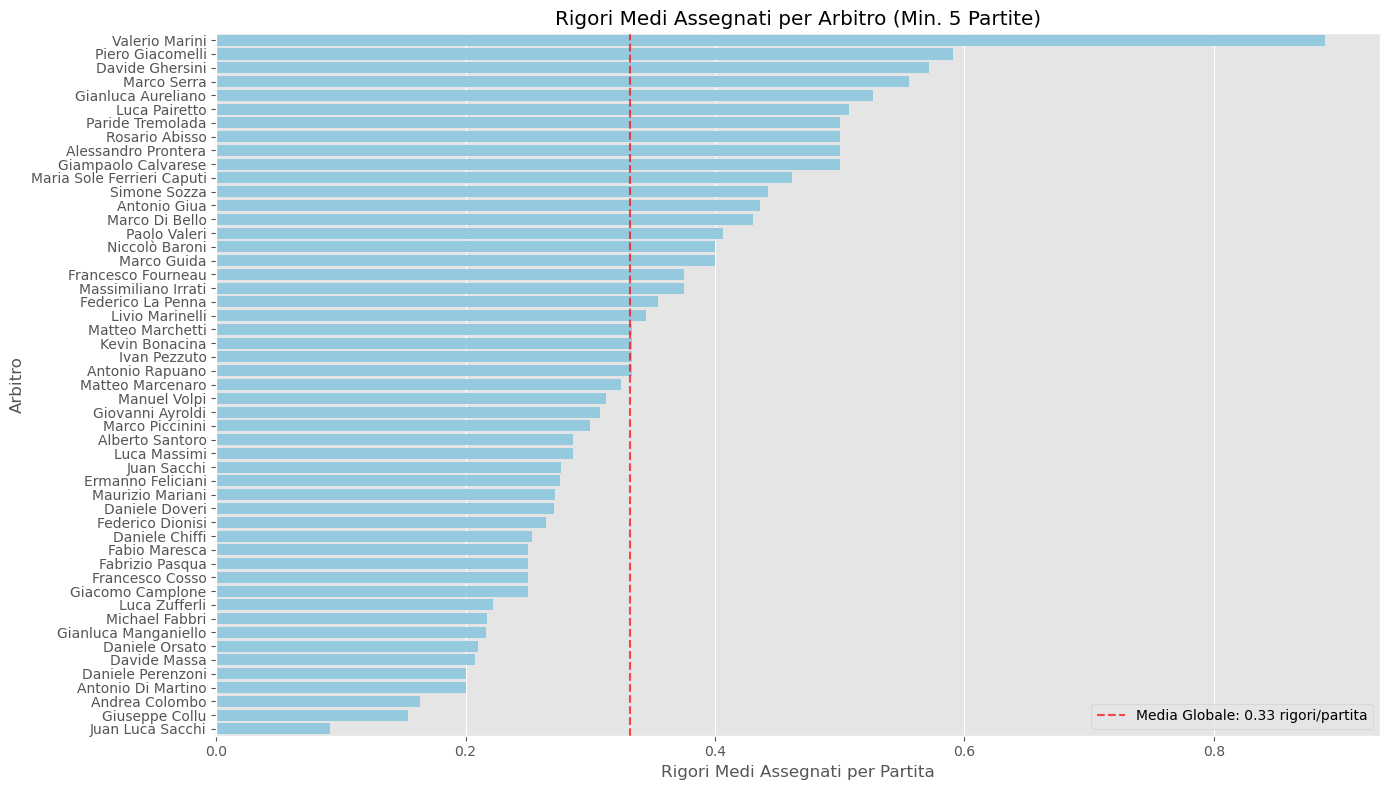

In [74]:
# 1. Calcola i rigori totali assegnati in OGNI partita 
df['Rigori_Totali_Partita'] = df['Rigori_Tentati_Casa'] + df['Rigori_Tentati_Ospite']

# 2. Aggrega i dati per Arbitro
Arbitri_Rigori = df.groupby('Arbitro').agg(
    Rigori_Totali_Assegnati=('Rigori_Totali_Partita', 'sum'),
    Partite_Dirette=('Arbitro', 'count')
).reset_index()

# 3. Calcola la metrica chiave: Rigori Medi per Partita
Arbitri_Rigori['Rigori_Medi_per_Partita'] = Arbitri_Rigori['Rigori_Totali_Assegnati'] / Arbitri_Rigori['Partite_Dirette']

# 4. Filtra per Arbitri con un Campione Significativo (almeno 5 partite)
Arbitri_Rigori_Filtrato = Arbitri_Rigori[Arbitri_Rigori['Partite_Dirette'] >= 5]
Arbitri_Rigori_Filtrato = Arbitri_Rigori_Filtrato.sort_values(
    'Rigori_Medi_per_Partita', ascending=False
)

# 5. Calcola la media globale 
media_rigori_globale = df['Rigori_Totali_Partita'].mean()


# --- GENERAZIONE DEL GRAFICO ---

plt.figure(figsize=(14, 8))

sns.barplot(
    data=Arbitri_Rigori_Filtrato,
    x='Rigori_Medi_per_Partita',
    y='Arbitro', # Assumo che la colonna sia 'Nome_Arbitro' non 'Arbitro'
    color='skyblue'
)

# Aggiungi la media globale come linea di riferimento
plt.axvline(
    media_rigori_globale, # Ora questa variabile è definita!
    color='red',
    linestyle='--',
    alpha=0.7,
    label=f'Media Globale: {media_rigori_globale:.2f} rigori/partita'
)

plt.title('Rigori Medi Assegnati per Arbitro (Min. 5 Partite)')
plt.xlabel('Rigori Medi Assegnati per Partita')
plt.ylabel('Arbitro')
plt.legend()
plt.tight_layout()
plt.show()

Si denotano qui arbitri 'severi' e arbitri più 'permissivi' in base a chi va oltre o rimane nella barra rossa (media).

Se un arbitro "severo" è assegnato a una partita, potresti voler aumentare leggermente la probabilità di assegnazione di un rigore nel tuo modello predittivo, indipendentemente dalle squadre coinvolte.

# Partite "eccezionali"

In [61]:
max_risultato = df[df['Goals_Totali'] >=8].reset_index()
max_risultato[['Data', 'Squadra_Casa', 'Squadra_Ospite', 'Gol_Fatti_Casa', 'Gol_Fatti_Ospite']]

,Data,Squadra_Casa,Squadra_Ospite,Gol_Fatti_Casa,Gol_Fatti_Ospite
0,2021-01-03,Inter,Crotone,6.0,2.0
1,2021-04-18,Lazio,Benevento,5.0,3.0
2,2021-12-02,Lazio,Udinese,4.0,4.0
3,2022-01-09,Udinese,Atalanta,2.0,6.0
4,2022-04-27,Atalanta,Torino,4.0,4.0
5,2023-01-15,Atalanta,Salernitana,8.0,2.0
6,2024-10-27,Inter,Juventus,4.0,4.0


Le partite con un totale di 8 o più gol sono rari eventi di sregolatezza difensiva.

L'Atalanta è coinvolta in 3 partite su 7 con 8 o più gol totali. Questo conferma visivamente che, pur essendo una squadra d'élite (come visto nei grafici dei punti), è anche la squadra più incline a un gioco ultra-offensivo e ad alto rischio. La partita 8-2 contro la Salernitana è l'esempio lampante di questo approccio.

Pareggi Estremi: Tre delle sette partite (4-4) sono terminate in pareggio. Questo suggerisce che quando il livello di sregolatezza difensiva è così alto da produrre 8 gol, è probabile che entrambe le squadre abbiano contribuito equamente all'assurdità del punteggio.

Lazio e Inter: La Lazio e l'Inter (coinvolte 2 volte ciascuna) sono anch'esse protagoniste di questi scenari. L'Inter ha un risultato di dominio (6-2) e uno di sregolatezza (4-4), mostrando una certa versatilità nei match folli.

### Valuto se c'è un picco di rigori in queste partite

In [63]:
# 1. Ci assicuriamo che le colonne Rigori Totali esistano nel DataFrame COMPLETO ('df')
if 'Rigori_Totali_Partita' not in df.columns:
    df['Rigori_Totali_Partita'] = df['Rigori_Tentati_Casa'] + df['Rigori_Tentati_Ospite']

# 2. Calcola la media globale dei rigori per partita (sul DataFrame completo)
media_globale_rigori = df['Rigori_Totali_Partita'].mean()

# 3. Calcola la media dei rigori SOLAMENTE sulle partite anomale (df_anomale)
media_anomale_rigori = max_risultato['Rigori_Totali_Partita'].mean()

# 4. Conta il numero di partite anomale per il contesto
conteggio_anomale = len(max_risultato)

In [65]:
print(f"--- Analisi dei Rigori nelle {conteggio_anomale} Partite Anomale ---")
print("-" * 50)
print(f"Media Globale Rigori per Partita: {media_globale_rigori:.3f}")
print(f"Media Rigori per Partita Anomala: {media_anomale_rigori:.3f}")

# Calcola la differenza percentuale
differenza_percentuale = ((media_anomale_rigori - media_globale_rigori) / media_globale_rigori) * 100

if media_anomale_rigori > media_globale_rigori:
    print(f"\nRISULTATO: Nelle partite anomale, i rigori assegnati sono MAGGIORI del {differenza_percentuale:.1f}% rispetto alla media globale.")
elif media_anomale_rigori < media_globale_rigori:
    print(f"\nRISULTATO: Nelle partite anomale, i rigori assegnati sono MINORI del {abs(differenza_percentuale):.1f}% rispetto alla media globale.")
else:
    print("\nRISULTATO: Non c'è alcuna differenza significativa nella media dei rigori assegnati.")

--- Analisi dei Rigori nelle 7 Partite Anomale ---
--------------------------------------------------
Media Globale Rigori per Partita: 0.332
Media Rigori per Partita Anomala: 1.714

RISULTATO: Nelle partite anomale, i rigori assegnati sono MAGGIORI del 416.1% rispetto alla media globale.


Come possiamo notare in queste partite anomale abbiamo un picco notevole di rigori.

# Heatmap: gol in casa vs trasferta per stagione

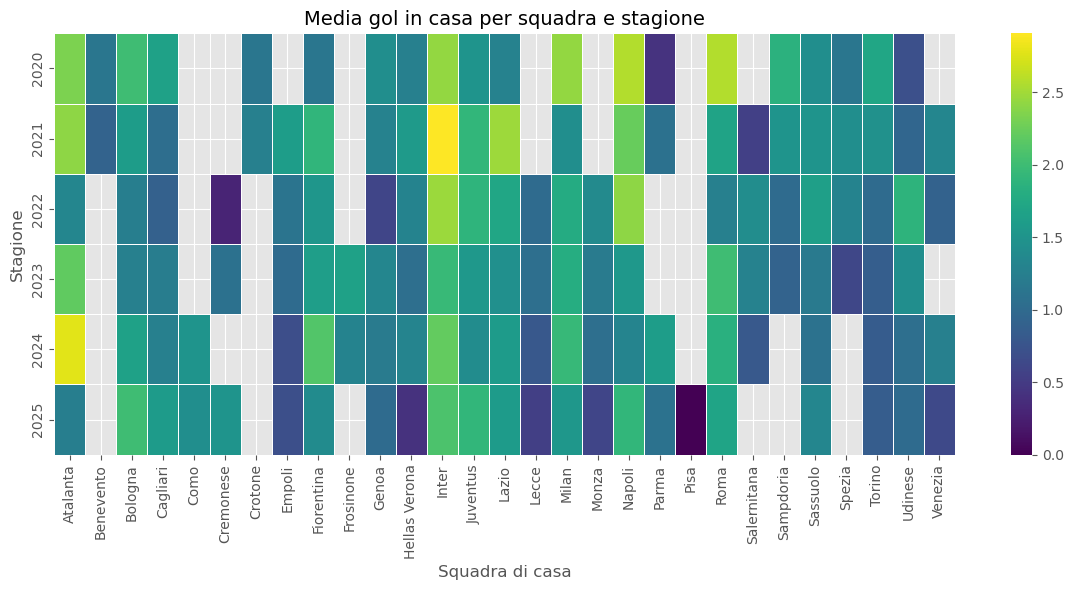

In [103]:
df = df.reset_index(drop=True) 

plt.style.use('ggplot')
sns.set_palette('viridis')

df['Data'] = pd.to_datetime(df['Data']) # Ora 'Data' dovrebbe essere accessibile
df = df.sort_values('Data')

# Aggiungi colonna stagione (anno) e gol totali
df['Stagione'] = df['Data'].dt.year
df['Goals_Totali'] = df['Gol_Fatti_Casa'] + df['Gol_Fatti_Ospite']

home_goals_by_season = df.groupby(['Stagione','Squadra_Casa'])['Gol_Fatti_Casa'].mean().unstack()
plt.figure(figsize=(12,6))
sns.heatmap(home_goals_by_season, cmap='viridis', linewidths=.5)
plt.title('Media gol in casa per squadra e stagione', fontsize=14)
plt.xlabel('Squadra di casa')
plt.ylabel('Stagione')
plt.tight_layout()
plt.show()

La heatmap mostra in modo chiaro l'evoluzione offensiva di ogni squadra in casa nel corso delle stagioni (2020-2025), utilizzando una scala di colore dove il giallo brillante indica la media gol più alta ($\approx 2.5$) e il blu scuro/nero indica la media gol più bassa ($\approx 0.0$).

***I Dominatori Offensivi (Colori Gialli)***

Le squadre che costantemente hanno avuto le migliori performance offensive in casa sono:

Inter: Presenta colori giallo/verde brillante in quasi tutte le stagioni, confermando il suo status di squadra d'élite e la sua estrema efficacia offensiva in casa, in linea con il quadrante élite del grafico casa-trasferta.

Napoli: Ha mostrato un'ottima media gol, spesso in linea con l'Inter.

Atalanta: Presenta regolarmente colori intensi (verde scuro/giallo). Questo supporta l'analisi precedente: l'Atalanta è protagonista di match ad alto punteggio ed è la squadra più incline al gioco ultra-offensivo.

***Le Crisi e i Crolli (Colori Blu Scuro)***

I colori scuri sono stagioni di grave difficoltà offensiva in casa, un fattore fortemente predittivo di sconfitta ($\text{Gol\_Fatti\_Casa}$contro$\text{Casa\_Vince} = +0.63$).

Crotone/Benevento/Venezia: Queste squadre, quando presenti (soprattutto nella stagione 2021), sono quasi totalmente blu scuro, confermando le loro difficoltà offensive che le hanno spinte nel quadrante debole dei vostri scatter plot.

Pisa/Cagliari/Frosinone: Mostrano anch'esse strisce di blu scuro, indicando stagioni o periodi in cui la loro capacità di segnare in casa è stata pesantemente compromessa. 

***Tendenze Stagionali e Anomalia 2024***

Omogeneità nel 2024 e 2025: Le stagioni 2024 e 2025 sembrano essere le più "gialle" in generale. 

Questo è in linea con la scoperta precedente che la media dei gol per partita è aumentata nel tempo, culminando con un picco nel 2024.

Anomalia della Juventus (2025): Si nota una fascia di colore viola scuro/nero (media gol molto bassa) per la Juventus nella stagione 2025 . 

Sebbene la Juventus sia generalmente un top club, questo indica un inizio o un periodo di estrema difficoltà nel segnare in casa in quella specifica stagione, un fatto sorprendente data la sua tradizionale forza.

***Conclusione***

La Heatmap è una sintesi visiva efficace: mostra che le squadre di successo (Inter, Napoli, Atalanta) sono quelle che mantengono il colore verde/giallo (alta media gol) anno dopo anno. Le squadre con il rischio di retrocessione sono definite dalle grandi fasce di colore blu scuro/nero , che riflettono la loro incapacità di segnare in casa, il fattore più critico per ottenere punti.